## Backpropagation
Using backpropagation to train a multi-layer perceptron (with a single hidden layer).  I will experiment with different patterns and see how quickly or slowly the weights converge.  I will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Cesar Borroto

In [2]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

shape of x_mat_full is (500, 3)
shape of y is (500,)


C:\Users\cesar\AppData\Local\Temp\ipykernel_15600\3569706766.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
C:\Users\cesar\AppData\Local\Temp\ipykernel_15600\3569706766.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')


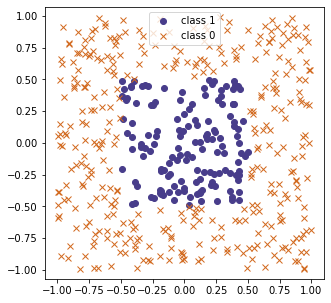

In [3]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)

num_obs = 800
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# MUST PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
# y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');



Helper functions

In [4]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))


def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient


def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

iteration 0, log loss is 0.6069, accuracy is 0.708
iteration 200, log loss is 0.5933, accuracy is 0.708
iteration 400, log loss is 0.4857, accuracy is 0.708
iteration 600, log loss is 0.4027, accuracy is 0.768
iteration 800, log loss is 0.3320, accuracy is 0.836
iteration 1000, log loss is 0.2260, accuracy is 0.928
iteration 1200, log loss is 0.1884, accuracy is 0.934
iteration 1400, log loss is 0.1725, accuracy is 0.938
iteration 1600, log loss is 0.1634, accuracy is 0.938
iteration 1800, log loss is 0.1575, accuracy is 0.936
iteration 2000, log loss is 0.1531, accuracy is 0.94
iteration 2200, log loss is 0.1497, accuracy is 0.94
iteration 2400, log loss is 0.1468, accuracy is 0.94
iteration 2600, log loss is 0.1443, accuracy is 0.938
iteration 2800, log loss is 0.1421, accuracy is 0.938
iteration 3000, log loss is 0.1400, accuracy is 0.942
iteration 3200, log loss is 0.1382, accuracy is 0.942
iteration 3400, log loss is 0.1364, accuracy is 0.94
iteration 3600, log loss is 0.1348, acc

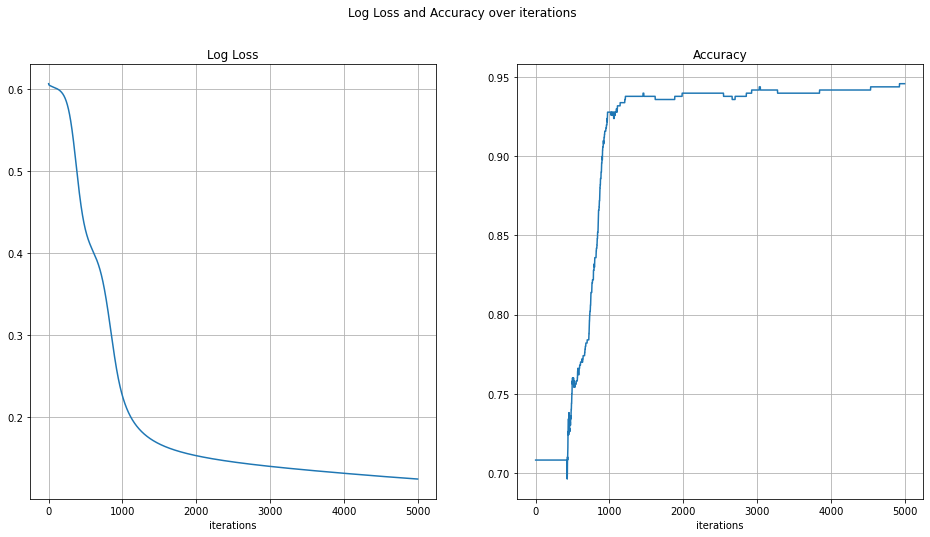

In [30]:
#### Initialize the network parameters

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
num_iter = 5000
learning_rate = .002
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(num_iter):
    ### Do a forward computation, and get the gradient 
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1,W_2)
    
    ## Update the weight matrices
    W_1 = W_1 - learning_rate*J_W_1_grad
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy 
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)
    
    ## Print the loss and accuracy for every 200th iteration
    if((i%200) == 0):
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
plot_loss_accuracy(loss_vals, accuracies)



Plotting the predicted answers, with mistakes in yellow

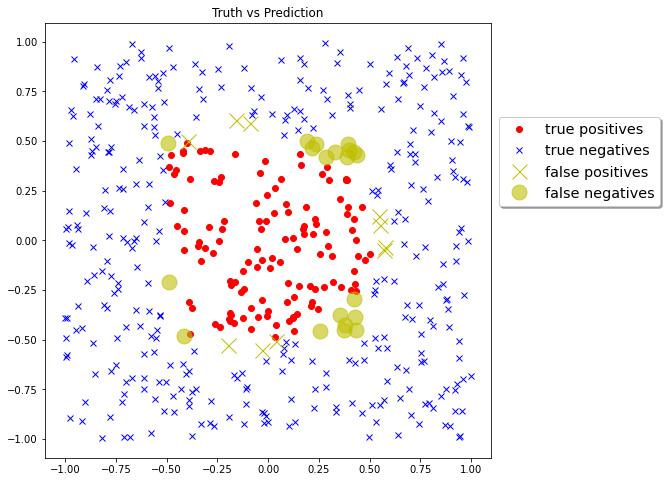

In [6]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8,8))
# true predictions 
ax.plot(x_mat[pred1 & (y==1),0], x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0], x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0], x_mat[pred1 & (y==0),1], 'yx', label='false positives',markersize=15)
ax.plot(x_mat[pred0 & (y==1),0], x_mat[pred0 & (y==1),1], 'yo', label='false negatives',markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1,0.8), fancybox=True, shadow=True, fontsize='x-large');